# Chapter 14 - Random Walks and More About Data Visualization

This book is about using computation to solve problems. Thus far, we have focused our attention on problems that can be solved by a *__deterministic program.
A program is deterministic if whenever it is run on the same input, it produces
the same output.__* Such computations are highly useful, but clearly not sufficient
to tackle some kinds of problems. Many aspects of the world in which we live can
be accurately modeled only as *__stochastic processes. A process is stochastic if its
next state can depend upon some random element.__* The outcome of a stochastic
process is usually uncertain. Therefore, we can rarely make definitive statements
about what they will do. Instead, we make *__probabilistic statements about what
they might do.__* The rest of this book deals with building programs that help to
understand uncertain situations. Many of these programs will be simulation
models.

A simulation mimics the activity of a real system. For example, the code in
Figure 8.11 simulates a person making a series of mortgage payments. Think of
that code as an experimental device, called a simulation model, that provides
useful information about the possible behaviors of the system being modeled.
Among other things, simulations are widely used to predict a future state of a
physical system (e.g., the temperature of the planet 50 years from now), and in
lieu of physical experiments that would be too expensive, time consuming, or
dangerous to perform (e.g., the impact of a change in the tax code).

*__It is important to remember that simulation models, like all models, are only
an approximation of reality.__* One can never be sure that the actual system will behave in the way predicted by the model. In fact, one can usually be pretty confident that the actual system will not behave exactly as predicted by the model. For
example, not every borrower will make all mortgage payments on time. It is a
commonly quoted truism that *__“all models are wrong, but some are useful.”__*

## 14.1 Random Walks

*__In 1827, the Scottish botanist Robert Brown observed that pollen particles suspended in water seemed to float around at random. He had no plausible explanation for what came to be known as Brownian motion__*, and made no attempt to
model it mathematically. A clear mathematical model of the phenomenon was
first presented in 1900 in Louis Bachelier’s doctoral thesis, The Theory of Speculation. However, since this thesis dealt with the then disreputable problem of understanding financial markets, it was largely ignored by respectable academics.
Five years later, *__a young Albert Einstein brought this kind of stochastic thinking
to the world of physics with a mathematical model almost the same as Bachelier’s
and a description of how it could be used to confirm the existence of atoms.__*
For some reason, people seemed to think that understanding physics was more
important than making money, and the world started paying attention. Times
were certainly different.

*__Brownian motion is an example of a random walk.__* Random walks are widely
used to model physical processes (e.g., diffusion), biological processes (e.g., the
kinetics of displacement of RNA from heteroduplexes by DNA), and social processes (e.g., movements of the stock market).
In this chapter we look at random walks for three reasons:
* Random walks are intrinsically interesting and widely used.
* It provides us with a good example of how to use abstract data types and inheritance to structure programs in general and simulation models in particular.
* It provides an opportunity to introduce a few more features of Python and to
demonstrate some additional techniques for producing plots.

## 14.2 The Drunkard's Walk

Let’s look at a random walk that actually involves walking. A drunken farmer is
standing in the middle of a field, and every second the farmer takes one step in a
random direction. What is her (or his) expected distance from the origin in 1000
seconds? If she takes many steps, is she likely to move ever farther from the
origin, or is she more likely to wander back to the origin over and over, and end
up not far from where she started? Let’s write a simulation to find out.

Before starting to design a program, it is always a good idea to try to develop
some intuition about the situation the program is intended to model. Let’s start
by sketching a simple model of the situation using Cartesian coordinates. Assume that the farmer is standing in a field where the grass has, mysteriously, been
cut to resemble a piece of graph paper. Assume further that each step the farmer
takes is of length one and is parallel to either the x-axis or y-axis.

![](unusual_farmer.jpg)

The picture on the left of Figure 14.1 depicts a farmer91 standing in the middle of the field. The smiley faces indicate all the places the farmer might be after
one step. Notice that after one step she is always exactly one unit away from
where she started. Let’s assume that she wanders eastward from her initial location on her first step. How far away might she be from her initial location after
her second step?

Looking at the smiley faces in the picture on the right, we see that with a
probability of 0.25 she will be 0 units away, with a probability of 0.25 she will be 2
units away, and with a probability of 0.5 she will be 2 units away. So, on average  she will be farther away after two steps than after one step. What about the
third step? If the second step is to the top or bottom smiley face, the third step
will bring the farmer closer to the origin half the time and farther half the time. If
the second step is to the left smiley face (the origin), the third step will be away
from the origin. If the second step is to the right smiley face, the third step will be
closer to the origin a quarter of the time, and farther away three quarters of the
time.

*__It seems as if the more steps the drunk takes, the greater the expected distance from the origin.__* We could continue this exhaustive enumeration of possibilities and perhaps develop a pretty good intuition about how this distance
grows with respect to the number of steps. However, it is getting pretty tedious,
so it seems like a better idea to write a program to do it for us.

Let’s begin the design process by thinking about some data abstractions that
are likely to be useful in building this simulation and perhaps simulations of other kinds of random walks. As usual, we should try to invent types that correspond to the kinds of things that appear in the situation we are attempting to
model. *__Three obvious types are Location, Field, and Drunk__*. As we look at the classes providing these types, it is worthwhile to think about what each might imply
about the kinds of simulation models they will allow us to build.

Let’s start with Location, Figure 14.2. This is a simple class, but it does embody two important decisions.  *__It described a flat 2D universe__*, e.g., the simulation will not model changes in altitude. This is consistent with the pictures above. Also, since the values supplied for deltaX and
deltaY could be floats rather than integers, *__there is no built-in assumption in this
class about the set of directions in which a drunk might move__*. This is a generalization of the informal model in which each step was of length one and was parallel to the x-axis or y-axis.

Class Field, Figure 14.2, is also quite simple, but it too embodies notable decisions. *__It simply maintains a mapping of drunks to locations__*. It places no constraints on locations, so presumably a Field is of unbounded size. It allows
multiple drunks to be added into a Field at random locations. It says nothing
about the patterns in which drunks move, nor does it prohibit multiple drunks
from occupying the same location or moving through spaces occupied by other
drunks.

In [110]:
class Location(object):
    """class Location describe a flat 2D universe."""
    
    def __init__(self,x,y):
        """x and y are numbers."""
        self.x, self.y = x,y
        
    def move(self,deltaX,deltaY):
        """deltaX and deltaY are (float) numbers."""
        return Location(self.x + deltaX, self.y + deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self,other):
        #other is another instance of Location
        ox,oy = other.x,other.y
        xDist,yDist = self.x-ox,self.y-oy
        return (xDist**2 + yDist**2)**0.5
    
    def __str__(self):
        #retunr location (x,y coordinate).
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

Let's try a bit some method of class Location.

In [111]:
drunk1_loc = Location(3,4)
drunk2_loc = Location(1,2)

print(drunk1_loc.distFrom(drunk2_loc))

2.8284271247461903


In [112]:
class Field(object):
    """class Field maintains a mapping from drunk to location."""
    
    def __init__(self):
        self.drunks = {} #create empty dict.
        
    def addDrunk(self,drunk,loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk.')
        else:
            self.drunks[drunk] = loc #add new key:drunk and value:loc.
            
    def moveDrunk(self,drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field.')
        xDist,yDist = drunk.takeStep() #method takeStep is defined in class UsualDrunk.
        currentLocation = self.drunks[drunk]
        #use move method of Location to get new location.
        self.drunks[drunk] = currentLocation.move(xDist,yDist)
        
    def getLoc(self,drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in the field.')
        return self.drunks[drunk]

*__The classes Drunk and UsualDrunk in define the ways in which a
drunk might wander through the field. In particular the value of stepChoices in
UsualDrunk introduces the restriction that each step is of length one and is parallel
to either the x-axis or y-axis__*. Since the function random.choice returns a randomly
chosen member of the sequence that it is passed, each kind of step is equally likely and not influenced by previous steps. A bit later we will look at subclasses of
Drunk with different kinds of behaviors.

In [113]:
import random

class Drunk(object):
    def __init__(self,name=None):
        """Assumes name is a str."""
        self.name = name
        
    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'
    
class UsualDrunk(Drunk):
    """Define the ways in which a drunk might wander through the field.
       In this class each step is of length one and is parallel to either
       x-axis or y-axis."""
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1,0), (-1,0)]
        #uniform dist. over stepChoices
        return random.choice(stepChoices)

The next step is to use these classes to build a simulation that answers the
original question. Figure 14.4 contains three functions used in this simulation.

The function *walk* simulates one walk of *numSteps* step. The function *simWalks* calls *walk* to simulate *numTrials* walks of *numSteps* steps each. The function *drunkTest* calls *simWalks* to simulate walks of varying length. 

The parameter dClass of simWalks is of type class, and is used in the first line
of code to create a Drunk of the appropriate subclass. Later, when drunk.takeStep is
invoked from Field.moveDrunk, the method from the appropriate subclass is automatically selected.

The function drunkTest also has a parameter, dClass, of type class. It is used
twice, once in the call to simWalks and once in the first print statement. In the
print statement, the built-in class attribute __ name __ is used to get a string with
the name of the class.

In [114]:
def walk(f,d,numSteps):
    """Assumes: f is a Field, d is a drunk in f, and numSteps an int>=0.
       Moves d numSteps times. Return the distance between the final location
       and the location at the start of the walk."""
    start = f.getLoc(d) #coord. of starting point.
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

def simWalks(numSteps, numTrials, dClass):
    """Assumes numSteps an int>=0, numTrials an int>0,
       dClass a subclass of Drunk. Simulates numTrials walks
       of numSteps each. Return a list of the final distances 
       for each trial."""
    Homer = dClass()
    origin = Location(0,0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer,origin)
        distances.append(round(walk(f, Homer, numSteps),1))
    return distances

def drunkTest(walkLengths, numTrials, dClass):
    """Assumes walkLengths a sequences of int>=0, numTrials an int>0,
       dClass a subclass of Drunk. For each number of steps in walkLengths,
       run simWalks with numTrials walks and print results."""
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps.')
        print('Mean =', round(sum(distances)/len(distances),4))
        print('Max =', max(distances), 'Min =', min(distances),'\n')

Let's try to execute *drunkTest*. Let’s try walks of zero steps (for which the
mean, minimum and maximum distances from the origin should all be 0) and
one step (for which the mean, minimum and maximum distances from the
origin should all be 1).

In [117]:
drunkTest((0,1), 100, UsualDrunk)

UsualDrunk random walk of 0 steps.
Mean = 0.0
Max = 0.0 Min = 0.0 

UsualDrunk random walk of 1 steps.
Mean = 1.0
Max = 1.0 Min = 1.0 



In [118]:
drunkTest((10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunk random walk of 10 steps.
Mean = 2.624
Max = 6.0 Min = 0.0 

UsualDrunk random walk of 100 steps.
Mean = 9.525
Max = 26.9 Min = 0.0 

UsualDrunk random walk of 1000 steps.
Mean = 28.195
Max = 63.9 Min = 3.2 

UsualDrunk random walk of 10000 steps.
Mean = 83.91
Max = 212.2 Min = 5.7 



As anticipated, the mean distance from the origin grows with the number of
steps. Always bring some skepticism to bear when looking at the results of a simulation. Ask if the results are plausible, and “smoke test” the simulation on parameters for which you have a strong intuition about what the results should be.

Now let’s look at a plot of the mean distances from the origin, Figure 14.5. To
give a sense of how fast the distance is growing, we have placed on the plot a line
showing the square root of the number of steps (and increased the number of
steps to 100,000). The plot showing the square root of the number of steps versus
the distance from the origin is a straight line because we used a logarithmic scale
on both axes.

![](mean_dist.jpg)

Does this plot provide any information about the expected final location of a
drunk? *__It does tell us that on average the drunk will be somewhere on a circle
with its center at the origin and with a radius equal to the expected distance from
the origin. However, it tells us very little about where we might actually find the
drunk at the end of any particular walk__*. We return to this topic in the next section.

## 14.3 Biased Random Walks

Now that we have a working simulation, we can start modifying it to investigate
other kinds of random walks. Suppose, for example, that we want to consider the
behavior of a drunken farmer in the northern hemisphere who hates the cold,
and even in his drunken stupor is able to move twice as fast when his random
movements take him in a southward direction. Or maybe a phototropic drunk
who always moves towards the sun (east in the morning and west in the afternoon). These are examples of *__biased random walks. The walk is still stochastic, but there is a bias in the outcome.__*

The following program defines two additional subclasses of Drunk. In each case *__the specialization involves choosing an appropriate value for stepChoices__*. The function
simAll iterates over a sequence of subclasses of Drunk to generate information
about how each kind behaves.

In [124]:
class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,1.0),(0.0,-2.0),(1.0,0.0),(-1.0,0.0)]
        return random.choice(stepChoices)
    
class EWDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(1.0,0.0),(-1.0,0.0)]
        return random.choice(stepChoices)

def simAll(drunkKinds, walkLengths, numTrials):
    for dClass in drunkKinds:
        drunkTest(walkLengths, numTrials, dClass)

Let's run the program:

In [125]:
simAll((UsualDrunk,ColdDrunk,EWDrunk),(100,1000),10)

UsualDrunk random walk of 100 steps.
Mean = 8.55
Max = 17.0 Min = 0.0 

UsualDrunk random walk of 1000 steps.
Mean = 26.46
Max = 51.0 Min = 11.4 

ColdDrunk random walk of 100 steps.
Mean = 23.31
Max = 38.8 Min = 13.3 

ColdDrunk random walk of 1000 steps.
Mean = 248.01
Max = 301.1 Min = 206.8 

EWDrunk random walk of 100 steps.
Mean = 7.8
Max = 14.0 Min = 2.0 

EWDrunk random walk of 1000 steps.
Mean = 17.4
Max = 44.0 Min = 0.0 



It appears that our heat-seeking drunk moves away from the origin faster than
the other two kinds of drunk. However, it is not easy to digest all of the information in this output. It is once again time to move away from textual output and
start using plots.

Since we are showing a number of different kinds of drunks on the same
plot, we will associate a distinct style with each type of drunk so that it is easy to
differentiate among them. The style will have three aspects:
* The color of the line and marker,
* The shape of the marker, and
* The kind of the line, e.g., solid or dotted.

The class styleIterator rotates through a sequence of styles defined by the argument to styleIterator.__ init __.

In [130]:
class styleIterator(object):
    def __init__(self,styles):
        self.index = 0
        self.styles = styles
        
    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles)-1:
            self.index = 0
        else:
            self.index += 1
        return result

The print statements in simDrunk and simAll1 contribute nothing to the result of the
simulation. They are there because this simulation can take a rather long time to
complete, and *__printing an occasional message indicating that progress is being
made can be quite reassuring to a user who might be wondering if the program is
actually making progress__*.

The code produces the plot on logarithmic scale. Notice that both the
x and y axes are on a logarithmic scale. This was done by calling the plotting
functions pylab.semilogx and pylab.semilogy. These functions are always applied
to the current figure.

Starting simulation of UsualDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps
Starting simulation of ColdDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps
Starting simulation of EWDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps


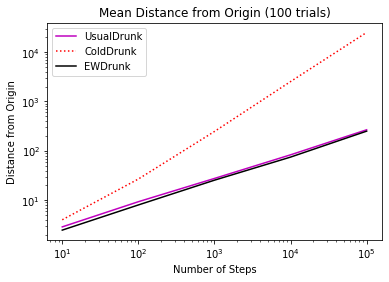

In [133]:
import pylab

def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    for numSteps in walkLengths:
        print('Starting simulation of', numSteps, 'steps')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials)/len(trials)
        meanDistances.append(mean)
    return meanDistances

def simAll1(drunkKinds, walkLengths, numTrials):
    styleChoice = styleIterator(('m-','r:','k-'))
    for dClass in drunkKinds:
        curStyle = styleChoice.nextStyle()
        print('Starting simulation of', dClass.__name__)
        means = simDrunk(numTrials, dClass, walkLengths)
        pylab.plot(walkLengths, means, curStyle, label = dClass.__name__)
    pylab.title('Mean Distance from Origin (' + str(numTrials) + ' trials)')
    pylab.xlabel('Number of Steps')
    pylab.ylabel('Distance from Origin')
    pylab.legend(loc = 'best')
    pylab.semilogx()
    pylab.semilogy()
    
simAll1((UsualDrunk, ColdDrunk, EWDrunk),(10,100,1000,10000,100000),100)

The usual drunk and the phototropic drunk (EWDrunk) seem to be moving
away from the origin at approximately the same pace, but the heat-seeking drunk
(ColdDrunk) seems to be moving away orders of magnitude faster. This is interesting, since on average he is only moving 25% faster (he takes, on average, five
steps for every four taken by the others).